# Modelo con DecisionTreeClassifier [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mariaprojas/AI-Project/blob/master/04%20-%20modelo%20con%20DecisionTreeClassifier.ipynb)


## Importando las librerias necesarias

In [1]:
#Importando librerias
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit, GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score, make_scorer, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import pickle
!pip install gdown
import gdown
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import NMF
from sklearn.pipeline import Pipeline
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Importando el archivo del dataset desde Google Drive

In [2]:
# Define ID 
archivo_id = "1-3UeC8FgrTSzs25JVH2WFAq-TA5Tg2IC"

# Asigna nombre para el archivo en Colab
d1 = "dataset_2.zip"

# Construye el enlace de descarga del archivo
enlace_descarga = "https://drive.google.com/uc?id=" + archivo_id

# Descarga el archivo desde el enlace de descarga y lo guarda en Colab
gdown.download(enlace_descarga, d1, quiet=False)

!unzip -q dataset_2.zip

Downloading...
From: https://drive.google.com/uc?id=1-3UeC8FgrTSzs25JVH2WFAq-TA5Tg2IC
To: /content/dataset_2.zip
100%|██████████| 38.6M/38.6M [00:00<00:00, 106MB/s]


In [3]:
ruta_pickle = 'data.pickle'  # Ruta al archivo data.pickle
with open(ruta_pickle, 'rb') as file:
    data = pickle.load(file)
d = pd.DataFrame(data)

##DecisionTreeClassifier

In [4]:
dtc=DecisionTreeClassifier()
# Dividir los datos en características (X) y variable objetivo (y)
X = d.drop('HasDetections', axis=1) 
y = d['HasDetections'].astype(int)

# Dividir los datos en conjuntos de entrenamiento y prueba
Xtv, Xts, ytv, yts = train_test_split(X, y, test_size=0.3)

###Busqueda de mejores hiperparametros

Esta parte del código tarda 2 h para ejecutar.

In [ ]:
# Define los hiperparámetros que deseas probar
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
}

# Define el método de validación cruzada ShuffleSplit
shuffle_split = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)

# Crea un objeto GridSearchCV para buscar los mejores hiperparámetros
grid_search = GridSearchCV(dtc, parameters, scoring='roc_auc', cv=shuffle_split)

# Ajusta el modelo en los datos
grid_search.fit(Xtv, ytv)

# Muestra los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Calcula el ROC AUC en el conjunto de prueba
best_classifier = grid_search.best_estimator_
y_pred = best_classifier.predict(Xts)
roc_auc = roc_auc_score(yts, y_pred)

print("ROC AUC en el conjunto de prueba:", roc_auc)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

Mejores hiperparámetros encontrados:
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 5}


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


ROC AUC en el conjunto de prueba: 0.6063546683718772


###Entrenamiento y score

Esta parte del código se demorá 20 min aproximadamente en ejecutarse.

In [ ]:
dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, min_samples_split= 5)
dtc.fit(Xtv,ytv)
y_pred=dtc.predict(Xts)
print(roc_auc_score(yts, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


0.6064541247944075


###Metrica

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


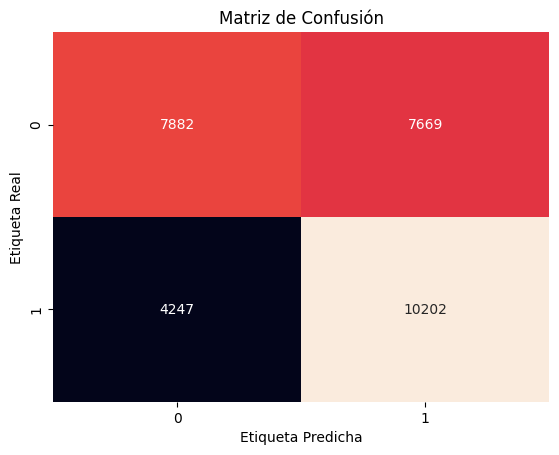

In [ ]:
# Definir un umbral para separar las clases
umbral = 0.5

# Convertir valores continuos a clases basadas en el umbral
y_train_clase = (ytv >= umbral)
y_test_clase = (yts >= umbral)

# Ajustar el clasificador con los datos de entrenamiento
dtc.fit(Xtv, y_train_clase)

# Realizar predicciones en los datos de prueba
y_pred_clase = dtc.predict(Xts)

# Crear una matriz de confusión
cm = confusion_matrix(y_test_clase, y_pred_clase)

# Mostrar la matriz de confusión
sns.heatmap(cm, annot=True, cbar=False, fmt="d")
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.title('Matriz de Confusión')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


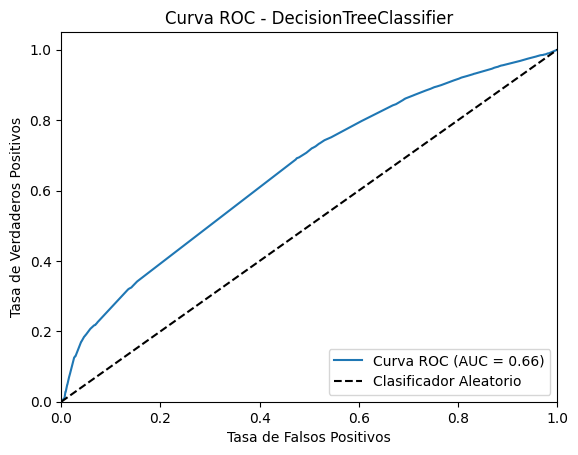

In [ ]:
# Obtener las probabilidades de la clase positiva para los datos de prueba
y_prob = dtc.predict_proba(Xts)[:, 1]

# Calcular la tasa de verdaderos positivos y la tasa de falsos positivos
fpr, tpr, thresholds = roc_curve(yts, y_prob)

# Calcular el área bajo la curva ROC
roc_auc = roc_auc_score(yts, y_prob)

# Trazar la curva ROC
plt.plot(fpr, tpr, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Clasificador Aleatorio')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - DecisionTreeClassifier')
plt.legend(loc="lower right")
plt.show()

###Curva de aprendizaje

Esta parte del código se demora 44 minutos en ejecutar.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

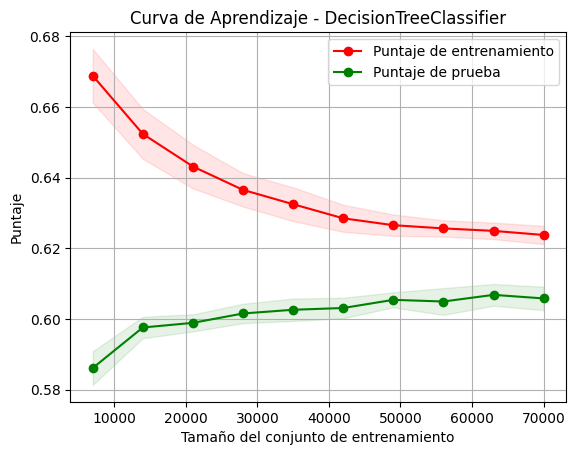

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import auc, roc_curve
from sklearn.model_selection import learning_curve

cv = ShuffleSplit(n_splits=10, test_size=.3)
# Calcular la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(dtc, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=cv)

# Calcular las medias y desviaciones estándar de los puntajes
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure()
plt.title("Curva de Aprendizaje - DecisionTreeClassifier")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Puntaje")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Puntaje de entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Puntaje de prueba")

plt.legend(loc="best")
plt.show()

##DecisionTreeClassifier con NMF

NMF no admite valores negativos, por lo que hay que quitar las filas que los continen.

In [5]:
X_negativos = X.loc[(X < 0).any(axis=1)]
X_negativos

,AVProductStatesIdentifier,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,IsProtected,...,Census_ActivationChannel_Volume:GVLK,Census_ActivationChannel_Volume:MAK,Census_FlightRing_Canary,Census_FlightRing_Disabled,Census_FlightRing_NOT_SET,Census_FlightRing_RP,Census_FlightRing_Retail,Census_FlightRing_Unknown,Census_FlightRing_WIF,Census_FlightRing_WIS
7161,41571.0,1.0,9.0,128857.0,27.0,240.0,122.697407,17134.0,256.0,1.0,...,0,0,0,0,0,0,1,0,0,0
42433,43856.0,1.0,155.0,149657.0,18.0,201.0,231.000000,16299.0,768.0,1.0,...,0,0,0,0,0,0,1,0,0,0


In [6]:
X = X.drop([7161,42433])

###Busqueda de mejores hiperparametros

Esta parte del código demora en ejecutar 42 min

In [9]:
# Definir el clasificador de árbol de decisión
dt_classifier = DecisionTreeClassifier()

Xhtv = Xtv.head(10000)
yhtv = ytv.head(10000)
# Definir la descomposición NMF
nmf = NMF()

# Definir el pipeline
pipeline = Pipeline([
    ('nmf', nmf),
    ('dt', dt_classifier)
])

# Definir los parámetros a ajustar en el pipeline
parameters = {
    'nmf__n_components': [2, 3, 4],  # Número de componentes para NMF
    'dt__max_depth': [None, 5, 10],  # Profundidad máxima del árbol de decisión
}

# Definir el generador de validación ShuffleSplit
shuffle_split = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)

# Realizar la búsqueda de hiperparámetros utilizando GridSearchCV con ShuffleSplit
grid_search = GridSearchCV(pipeline, parameters, cv=shuffle_split, scoring='roc_auc')
grid_search.fit(Xhtv, yhtv)

# Mostrar los mejores hiperparámetros encontrados y el desempeño asociado
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("Score ROC AUC promedio en la validación con ShuffleSplit:")
print(grid_search.best_score_)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

Mejores hiperparámetros encontrados:
{'dt__max_depth': 5, 'nmf__n_components': 2}
Score ROC AUC promedio en la validación con ShuffleSplit:
0.5332283533014637


###Entrenamiento y score

In [7]:
# Crear el pipeline
pip = Pipeline([
    ("NMF", NMF(n_components=2)),
    ("dt", DecisionTreeClassifier(max_depth=5))
])
y = y.drop([7161,42433])
Xtv, Xts, ytv, yts = train_test_split(X, y, test_size=0.3)
pip.fit(Xtv, ytv)
y_pred= pip.predict(Xts)
print(roc_auc_score(yts, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


0.5208722464398312


###Metrica

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


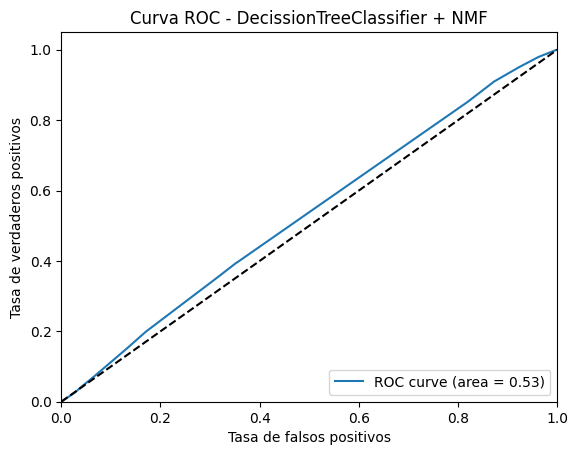

In [8]:
# Obtener las probabilidades de la clase positiva
y_prob = pip.predict_proba(Xts)[:, 1]

# Calcular la tasa de verdaderos positivos y la tasa de falsos positivos
fpr, tpr, thresholds = roc_curve(yts, y_prob)

# Calcular el área bajo la curva ROC
roc_auc = roc_auc_score(yts, y_prob)

# Trazar la curva ROC
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Línea base (clasificador aleatorio)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC - DecissionTreeClassifier + NMF')
plt.legend(loc="lower right")
plt.show()

###Curva de aprendizaje

Esta parte del código se demora 3h 11 min en ejecutar.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

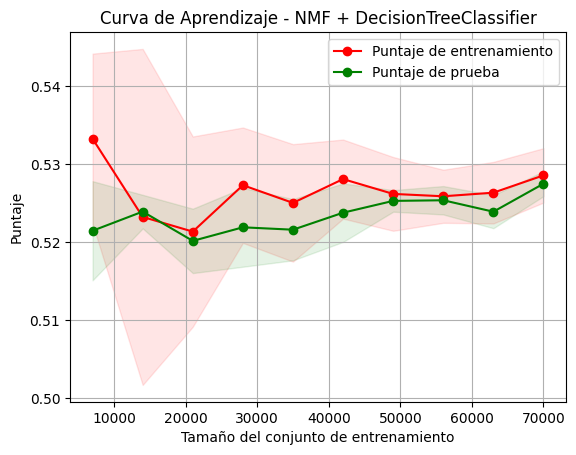

In [12]:
from sklearn.model_selection import ShuffleSplit, learning_curve
from sklearn.metrics import auc, roc_curve

cv = ShuffleSplit(n_splits=5, test_size=0.3)

# Calcular la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(pip, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=cv)

# Calcular las medias y desviaciones estándar de los puntajes
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure()
plt.title("Curva de Aprendizaje - NMF + DecisionTreeClassifier")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Puntaje")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Puntaje de entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Puntaje de prueba")

plt.legend(loc="best")
plt.show()
